# Data Wrangling II

Data Wrangling é um processo manual para transformar dados brutos em um formato adequado para análise.
ETL é um processo automatizado projetado para integrar, limpar e preencher dados em um repositório, normalmente um data warehouse. Embora a organização de dados seja exploratória e iterativa, o ETL é sistemático e definido.

## Coleta de Dados

A partir da lista de ativos da API Alpha Vantage em conjunto com a biblioteca Yahoo Finance, vamos criar uma nova base de dados com as ações, informando os dividendos dos últimos 5 anos. 


In [36]:
import pandas as pd

df = pd.read_csv('listing_status.csv', header=0)
df.head(10)

,symbol,name,exchange,assetType,ipoDate,delistingDate,status
0,A,Agilent Technologies Inc,NYSE,Stock,1999-11-18,NaN,Active
1,AA,Alcoa Corp,NYSE,Stock,2016-10-18,NaN,Active
2,AAA,ALTERNATIVE ACCESS FIRST PRIORITY CLO BOND ETF,NYSE ARCA,ETF,2020-09-09,NaN,Active
3,AAAU,Goldman Sachs Physical Gold ETF,BATS,ETF,2018-08-15,NaN,Active
4,AACG,ATA Creativity Global,NASDAQ,Stock,2008-01-29,NaN,Active
5,AACT,Ares Acquisition Corporation II - Class A,NYSE,Stock,2023-06-12,NaN,Active
6,AACT-U,Ares Acquisition Corporation II - Units (1 Ord...,NYSE,Stock,2023-04-21,NaN,Active
7,AACT-WS,Ares Acquisition Corporation II - Warrants (01...,NYSE,Stock,2023-06-12,NaN,Active
8,AADI,Aadi Bioscience Inc,NASDAQ,Stock,2017-08-08,NaN,Active
9,AADR,ADVISORSHARES DORSEY WRIGHT ADR ETF,NASDAQ,ETF,2010-07-21,NaN,Active


In [29]:
#! pip install yfinance
import yfinance as yf

def get_finance_data_name(symbol):
    try:
        return yf.Ticker(symbol).info['shortName']
    except:
        return f''

## Limpeza e Transformação dos Dados

Faremos um processo mais minucioso de limpeza dos dados, pois sabemos que há muitas inconsistências de tipos.

**Podemos avaliar por meio da função a seguir as informações básicas, contemplando dados ausentes:**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11628 entries, 0 to 11627
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   symbol         11627 non-null  object 
 1   name           11594 non-null  object 
 2   exchange       11628 non-null  object 
 3   assetType      11628 non-null  object 
 4   ipoDate        11628 non-null  object 
 5   delistingDate  0 non-null      float64
 6   status         11628 non-null  object 
dtypes: float64(1), object(6)
memory usage: 636.0+ KB


**Também é possível ver separadamente, com o uso das funções e propriedades a seguir:**

In [30]:
df.dtypes

symbol            object
name              object
exchange          object
assetType         object
ipoDate           object
delistingDate    float64
status            object
dtype: object

E também de dados ausentes:

In [4]:
df.isna().sum()

symbol               1
name                34
exchange             0
assetType            0
ipoDate              0
delistingDate    11628
status               0
dtype: int64

In [5]:
df.loc[df.name.isna()]

,symbol,name,exchange,assetType,ipoDate,delistingDate,status
456,AMEH,NaN,NASDAQ,Stock,2024-02-26,NaN,Active
487,AMRS,NaN,NASDAQ,Stock,2023-08-18,NaN,Active
896,AVRO,NaN,NASDAQ,Stock,2024-06-21,NaN,Active
2113,CLVS,NaN,NASDAQ,Stock,2023-01-03,NaN,Active
2419,CTEST,NaN,NYSE,Stock,2019-07-25,NaN,Active
2632,DEC,NaN,NYSE,Stock,2023-12-18,NaN,Active
2676,DFFN,NaN,NASDAQ,Stock,2023-08-17,NaN,Active
4135,FWP,NaN,NASDAQ,Stock,2022-12-27,NaN,Active
6994,MTEST,NaN,NYSE,Stock,2019-10-09,NaN,Active
7401,NTEST-G,NaN,NYSE,Stock,2019-07-17,NaN,Active


In [9]:
df.loc[df.symbol.isna()]

,symbol,name,exchange,assetType,ipoDate,delistingDate,status
7073,NaN,Nano Labs Ltd,NASDAQ,Stock,2022-07-12,NaN,Active


**Uma ferramenta que auxilia na visualização gráfica dos dados ausentes é o missingno:**

<Axes: >

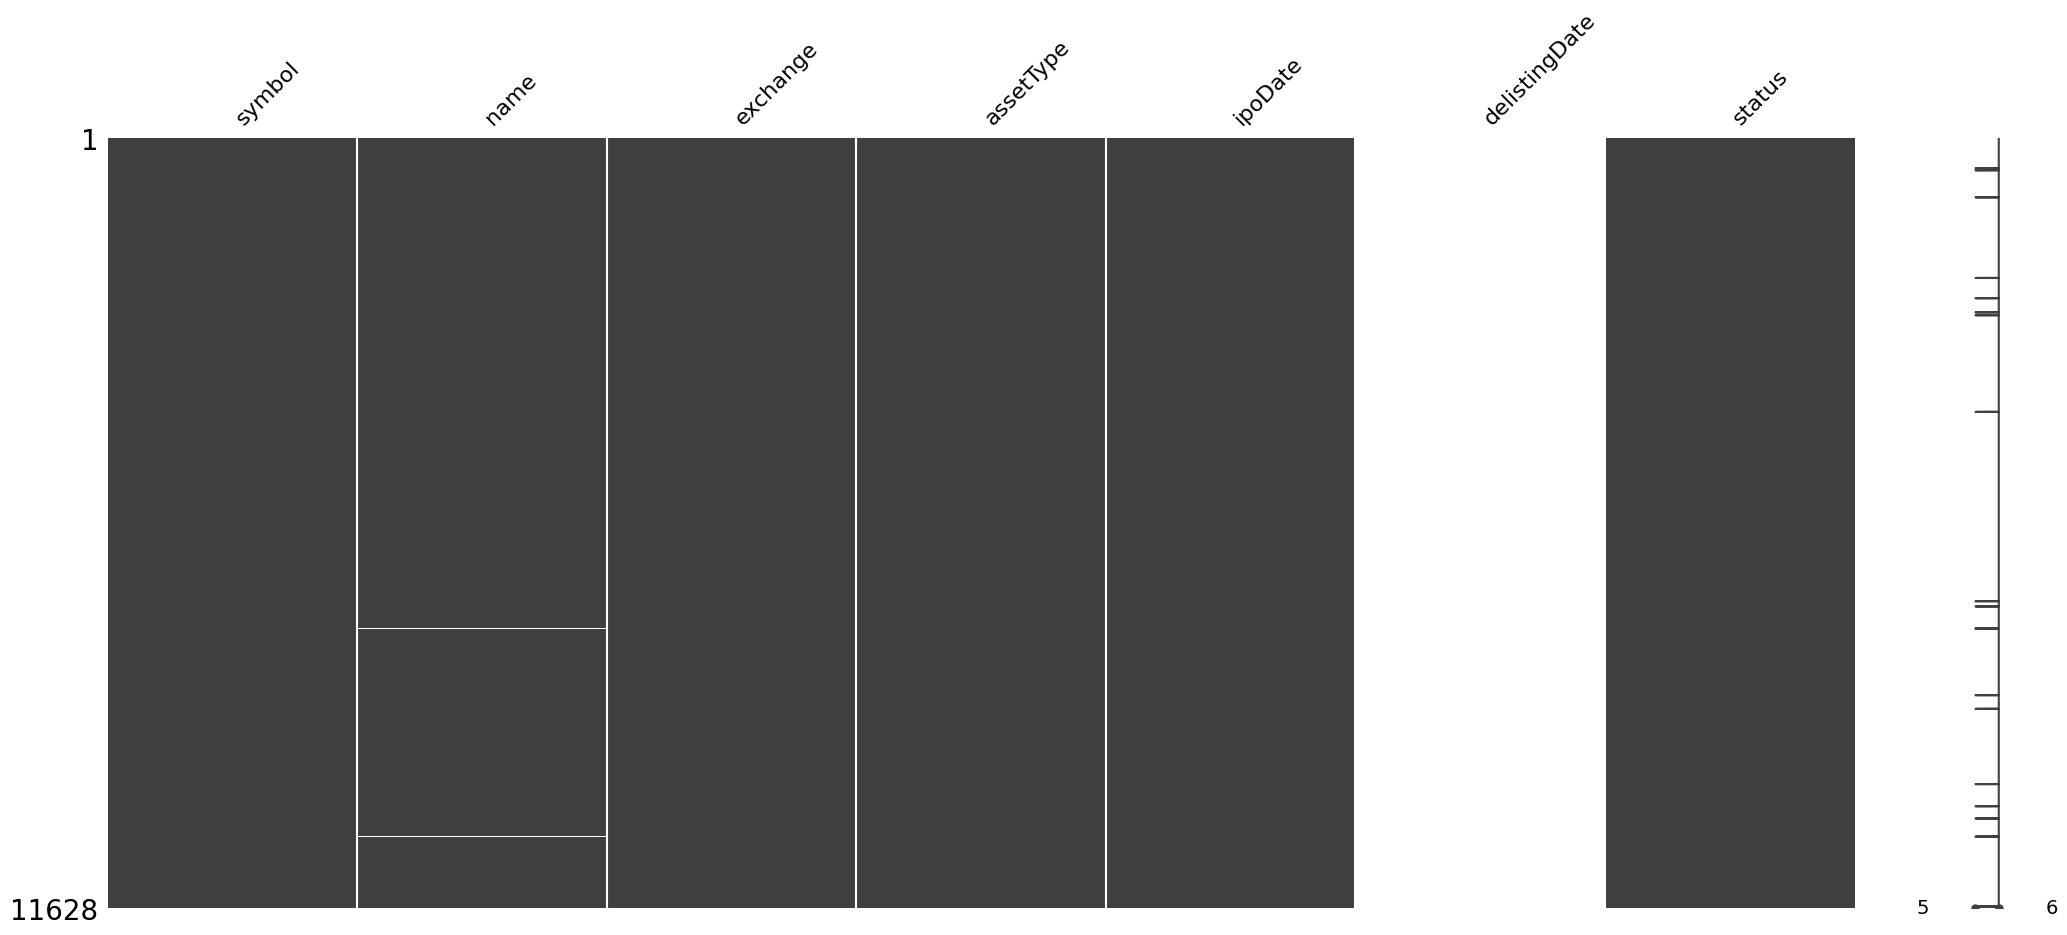

In [8]:
import missingno as msno
msno.matrix(df)

Vamos corrigir esses tipos para lidar melhor com essas informações:

In [37]:
df['ipoDate'] = pd.to_datetime(df['ipoDate'], format='%Y-%m-%d')
df['delistingDate'] = pd.to_datetime(df['delistingDate'], format='%Y-%m-%d')
df['assetType'] = df['assetType'].astype('category')
df['exchange'] = df['exchange'].astype('category')
# df['name'] = df['name'].astype('string')

In [38]:
df.dtypes

symbol                   object
name                     object
exchange               category
assetType              category
ipoDate          datetime64[ns]
delistingDate    datetime64[ns]
status                   object
dtype: object

## Integração dos Dados

Para cada linha com nome nulo, vamos recuperar essa informação com a função do Yahoo Finance. Para as que não forem possíveis de recuperar, vamos excluir essas linhas:

In [12]:
df['name'] = df.apply(lambda x: get_finance_data_name(x.symbol) if pd.isna(x['name']) or x['name'] == '' else x.name, axis=1)

404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/AMEH?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=AMEH&crumb=0sTsQgKNGWO
404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/DFFN?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=DFFN&crumb=0sTsQgKNGWO
404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/NTEST-G?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=NTEST-G&crumb=0sTsQgKNGWO
404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/NTEST-J?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=fin

In [13]:
df.dropna(subset=['name', 'symbol'], inplace=True)
df.drop(df[df.name == ''].index, inplace=True)

**Podemos reformatar o delistingDate para que não haja mais valores nulos:**

In [15]:
df.fillna({'delistingDate':'N/A'}, inplace=True)

**Vejamos agora como ficou o nosso dataset:**

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11598 entries, 0 to 11627
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   symbol         11598 non-null  object        
 1   name           11598 non-null  object        
 2   exchange       11598 non-null  category      
 3   assetType      11598 non-null  category      
 4   ipoDate        11598 non-null  datetime64[ns]
 5   delistingDate  11598 non-null  object        
 6   status         11598 non-null  object        
dtypes: category(2), datetime64[ns](1), object(4)
memory usage: 566.6+ KB


Agora vamos integrar à nossa base de dados informações sobre os dividendos pagos pelas empresas e ETF's nos últimos 5 anos:

In [17]:
def get_dividends_by_period(period, symbol):
    try: 
        return yf.Ticker(symbol).history(period=period).Dividends.sum() # 1d, 1w, 1m, 3m, 6m, 5y, 10y, ytd, max
    except:
        return 0

## Redução e Validação dos Dados

Vamos extrair uma amostra aleatória para iniciar a comparação do desempenho nominal dos dividendos dos últimos 5 anos entre as bolsas.

In [40]:
sample_df = df.sample(n=25)
sample_df

,symbol,name,exchange,assetType,ipoDate,delistingDate,status
10630,UNOV,Innovator U.S. Equity Ultra Buffer ETF - November,BATS,ETF,2019-11-01,NaT,Active
736,ASML,ASML Holding NV,NASDAQ,Stock,1995-03-16,NaT,Active
9927,SUPP,TCW Transform Supply Chain ETF,BATS,ETF,2023-02-15,NaT,Active
10640,UPGD,Invesco Raymond James SB-1 Equity ETF,NYSE ARCA,ETF,2006-05-19,NaT,Active
6225,LFST,LifeStance Health Group Inc,NASDAQ,Stock,2021-06-10,NaT,Active
6021,KODK,Eastman Kodak Company,NYSE,Stock,2013-09-23,NaT,Active
2324,CRD-B,Crawford & Co. - Class B,NYSE,Stock,1990-01-12,NaT,Active
9105,SAMG,Silvercrest Asset Management Group Inc - Class A,NASDAQ,Stock,2013-06-27,NaT,Active
7976,PDN,INVESCO FTSE RAFI DEVELOPED MARKETS EX-U.S. SM...,NYSE ARCA,ETF,2007-09-28,NaT,Active
6894,MPV,Barings Participation Investors,NYSE,ETF,1989-06-30,NaT,Active


In [127]:
sample_df['dividends_last_5_years'] = sample_df.apply(lambda x: get_dividends_by_period('5y', x.symbol), axis=1)
sample_df

FTIF: Period '5y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', 'ytd', 'max']
NCL: Period '5y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', 'ytd', 'max']
BAMG: Period '5y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', 'ytd', 'max']
$HGTY-WS: possibly delisted; no price data found  (period=5y) (Yahoo error = "No data found, symbol may be delisted")
LRGC: Period '5y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', 'ytd', 'max']
PMAX: Period '5y' is invalid, must be one of ['1d', '5d', '1mo', 'ytd', 'max']
MBINM: Period '5y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', 'ytd', 'max']


,symbol,name,exchange,assetType,ipoDate,delistingDate,status,dividends_last_5_years
3568,FAS,3568,NYSE ARCA,ETF,2008-11-19,NaT,Active,4.091
4083,FTIF,4083,NYSE ARCA,ETF,2023-03-14,NaT,Active,0.000
4198,GATEU,4198,NASDAQ,Stock,2021-10-01,NaT,Active,0.000
6543,MBI,6543,NYSE,Stock,1987-07-02,NaT,Active,8.000
7134,NCL,7134,NYSE MKT,Stock,2023-10-19,NaT,Active,0.000
8716,RDIV,8716,NYSE ARCA,ETF,2013-10-01,NaT,Active,7.406
7421,NTRA,7421,NASDAQ,Stock,2015-07-02,NaT,Active,0.000
2028,CIM,2028,NYSE,Stock,2007-11-16,NaT,Active,17.210
3981,FPRO,3981,BATS,ETF,2021-02-04,NaT,Active,1.927
5189,IDAT,5189,NYSE ARCA,ETF,2021-06-10,NaT,Active,0.616


Como a amostra aleatória trouxe muitas empresas novas, sem histórico de dividendos mínimo consistente para a nossa análise, vamos tentar refinar nossa amostra. Antes, vamos verificar a proporção de ativos por exchange e por tipo:

In [128]:
rate_exchange = df.exchange.value_counts(normalize=True)
rate_exchange

exchange
NASDAQ       0.447319
NYSE         0.263063
NYSE ARCA    0.192792
BATS         0.068633
NYSE MKT     0.028195
Name: proportion, dtype: float64

In [46]:
rate_asset = df.assetType.value_counts(normalize=True)
rate_asset

assetType
Stock    0.86795
ETF      0.13205
Name: proportion, dtype: float64

Para fins de simplificação, vamos deixar somente as exchanges mais conhecidas e verificar a proporção novamente:

In [43]:
df.drop(df[df.exchange == 'NYSE ARCA'].index, inplace=True)
df.drop(df[df.exchange == 'NYSE MKT'].index, inplace=True)
df.drop(df[df.exchange == 'BATS'].index, inplace=True)

In [44]:
rate_exchange = df.exchange.value_counts(normalize=True)
rate_exchange

exchange
NASDAQ       0.628903
NYSE         0.371097
BATS         0.000000
NYSE ARCA    0.000000
NYSE MKT     0.000000
Name: proportion, dtype: float64

Agora vamos extrair uma amostra obedecendo essas proporções:

In [45]:
exchange_sample = df.groupby('exchange').apply(lambda x: x.sample(int(10 * rate_exchange[x.name]))).droplevel('exchange')
exchange_sample

C:\Users\premier-improvement\AppData\Local\Temp\ipykernel_27164\2489681502.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  exchange_sample = df.groupby('exchange').apply(lambda x: x.sample(int(10 * rate_exchange[x.name]))).droplevel('exchange')
C:\Users\premier-improvement\AppData\Local\Temp\ipykernel_27164\2489681502.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  exchange_sample = df.groupby('exchange').apply(lambda x: x.sample(int(10 * rate_exchange[x.name]))).droplevel('exchange')


,symbol,name,exchange,assetType,ipoDate,delistingDate,status
2848,DOMH,Dominari Holdings Inc,NASDAQ,Stock,1984-09-07,NaT,Active
8968,RR,Richtech Robotics Inc - Class B,NASDAQ,Stock,2023-11-17,NaT,Active
2192,CNTB,Connect Biopharma Holdings Ltd,NASDAQ,Stock,2021-03-19,NaT,Active
1656,BWMN,Bowman Consulting Group Ltd,NASDAQ,Stock,2021-05-07,NaT,Active
7390,NSTS,NSTS Bancorp Inc,NASDAQ,Stock,2022-01-19,NaT,Active
9037,RVSNW,Rail Vision Ltd - Warrants (27/03/2027),NASDAQ,Stock,2022-03-31,NaT,Active
3332,EQT,EQT Corp,NYSE,Stock,1987-11-05,NaT,Active
8860,RJF,Raymond James Financial Inc,NYSE,Stock,1987-12-30,NaT,Active
5498,IQV,IQVIA Holdings Inc,NYSE,Stock,2013-05-09,NaT,Active


In [47]:
asset_sample = df.groupby('assetType').apply(lambda x: x.sample(int(10 * rate_asset[x.name]))).droplevel('assetType')
asset_sample

C:\Users\premier-improvement\AppData\Local\Temp\ipykernel_27164\3961626324.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  asset_sample = df.groupby('assetType').apply(lambda x: x.sample(int(10 * rate_asset[x.name]))).droplevel('assetType')
C:\Users\premier-improvement\AppData\Local\Temp\ipykernel_27164\3961626324.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  asset_sample = df.groupby('assetType').apply(lambda x: x.sample(int(10 * rate_asset[x.name]))).droplevel('assetType')


,symbol,name,exchange,assetType,ipoDate,delistingDate,status
5799,JPEF,JPMorgan Equity Focus ETF,NASDAQ,ETF,2023-07-31,NaT,Active
9102,SAJ,Saratoga Investment Corp,NYSE,Stock,2022-11-03,NaT,Active
11294,WVE,Wave Life Sciences Ltd,NASDAQ,Stock,2015-11-11,NaT,Active
7103,NBBK,NB Bancorp Inc,NASDAQ,Stock,2023-12-28,NaT,Active
8656,RAND,Rand Capital Corp,NASDAQ,Stock,1995-08-18,NaT,Active
5341,IMPPP,Imperial Petroleum Inc,NASDAQ,Stock,2021-12-06,NaT,Active
2350,CRMD,CorMedix Inc,NASDAQ,Stock,2010-05-13,NaT,Active
679,ARLO,Arlo Technologies Inc,NYSE,Stock,2018-08-03,NaT,Active
3264,ENR,Energizer Holdings Inc,NYSE,Stock,2000-03-27,NaT,Active


Para comparar dividendos, vamos adicionar as informações como anteriormente, em cada sample:

In [63]:
exchange_sample['dividends_last_5_years'] = exchange_sample.apply(lambda x: get_dividends_by_period('5y', x.symbol), axis=1)
exchange_sample


MKAM: Period '5y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', 'ytd', 'max']
$VCXA: possibly delisted; no price data found  (period=5y) (Yahoo error = "No data found, symbol may be delisted")
$ADAL: possibly delisted; no price data found  (period=5y) (Yahoo error = "No data found, symbol may be delisted")
$ATH-P-A: possibly delisted; no price data found  (period=5y) (Yahoo error = "No data found, symbol may be delisted")


,symbol,name,exchange,assetType,ipoDate,delistingDate,status,dividends_last_5_years
6763,MKAM,MKAM ETF,NASDAQ,ETF,2023-04-12,NaT,Active,0.000
5838,JSML,JANUS HENDERSON SMALL CAP GROWTH ALPHA ETF,NASDAQ,ETF,2016-02-25,NaT,Active,1.253
3025,EBC,Eastern Bankshares Inc,NASDAQ,Stock,2020-10-15,NaT,Active,1.440
10803,VCXA,10X Capital Venture Acquisition Corp II - Class A,NASDAQ,Stock,2021-10-05,NaT,Active,0.000
122,ADAL,Anthemis Digital Acquisitions I Corp - Class A,NASDAQ,Stock,2021-12-29,NaT,Active,0.000
10362,TRDA,Entrada Therapeutics Inc,NASDAQ,Stock,2021-10-29,NaT,Active,0.000
11151,WES,Western Midstream Partners LP,NYSE,Stock,2012-12-10,NaT,Active,10.089
781,ATH-P-A,Athene Holding Ltd,NYSE,Stock,2019-06-06,NaT,Active,0.000
9039,RVTY,Revvity Inc,NYSE,Stock,1983-04-06,NaT,Active,1.400


In [35]:
asset_sample['dividends_last_5_years'] = asset_sample.apply(lambda x: get_dividends_by_period('5y', x.symbol), axis=1)
asset_sample

VSTEW: Period '5y' is invalid, must be one of ['1d', '5d']
ASTSW: Period '5y' is invalid, must be one of ['1d', '5d']


,symbol,name,exchange,assetType,ipoDate,delistingDate,status,dividends_last_5_years
11075,VYMI,VANGUARD INTERNATIONAL HIGH DIVIDEND YIELD IND...,NASDAQ,ETF,2016-03-02,NaT,Active,13.541
5338,IMOM,ALPHA ARCHITECT INTERNATIONAL QUANTITATIVE MOM...,NASDAQ,ETF,2016-01-04,NaT,Active,2.971
5146,IBTF,ISHARES IBONDS DEC 2025 TERM TREASURY ETF,NASDAQ,ETF,2020-02-28,NaT,Active,2.354
11069,VXRT,Vaxart Inc,NASDAQ,Stock,2018-02-12,NaT,Active,0.000
8877,RM,Regional Management Corp,NYSE,Stock,2012-03-28,NaT,Active,4.450
4933,HRI,Herc Holdings Inc,NYSE,Stock,2006-11-16,NaT,Active,7.327
6418,LTRPA,Liberty TripAdvisor Holdings Inc - Series A,NASDAQ,Stock,2014-08-27,NaT,Active,0.000
11019,VSTEW,Vast Renewables Ltd - Warrants (01/07/2028),NASDAQ,Stock,2023-12-19,NaT,Active,0.000
755,ASTSW,AST SpaceMobile Inc - Warrants (06/04/2026),NASDAQ,Stock,2019-11-01,NaT,Active,0.000


Numa outra tentativa, vamos montar uma amostra considerando empresas listadas entre 5 e 10 anos:

In [86]:
five_year_df = df[df.ipoDate.dt.year.between(2014, 2019)]
five_year = five_year_df.ipoDate.dt.year.value_counts(normalize=True)

five_year_sample = five_year_df.groupby(five_year_df.ipoDate.dt.year).apply(lambda x: x.sample(int(25 * five_year[x.name]))).droplevel('ipoDate')
five_year_sample['dividends_last_5_years'] = five_year_sample.apply(lambda x: get_dividends_by_period('5y', x.symbol), axis=1)
five_year_sample


$EPR-P-E: possibly delisted; no price data found  (period=5y) (Yahoo error = "No data found, symbol may be delisted")
$GNT-P-A: possibly delisted; no price data found  (period=5y) (Yahoo error = "No data found, symbol may be delisted")
$BHR-P-D: possibly delisted; no price data found  (period=5y) (Yahoo error = "No data found, symbol may be delisted")
$KEY-P-K: possibly delisted; no price data found  (period=5y) (Yahoo error = "No data found, symbol may be delisted")
$ALL-P-I: possibly delisted; no price data found  (period=5y) (Yahoo error = "No data found, symbol may be delisted")
$EQH-P-A: possibly delisted; no price data found  (period=5y) (Yahoo error = "No data found, symbol may be delisted")
$ANG-P-A: possibly delisted; no price data found  (period=5y) (Yahoo error = "No data found, symbol may be delisted")


,symbol,name,exchange,assetType,ipoDate,delistingDate,status,dividends_last_5_years
9085,SABR,Sabre Corp,NASDAQ,Stock,2014-04-17,NaT,Active,0.420
6152,LBRDA,Liberty Broadband Corp - Series A,NASDAQ,Stock,2014-11-04,NaT,Active,0.000
3307,EPR-P-E,EPR Properties,NYSE,Stock,2014-09-22,NaT,Active,0.000
4471,GNK,Genco Shipping & Trading Ltd,NYSE,Stock,2014-08-18,NaT,Active,5.915
257,AGR,Avangrid Inc,NYSE,Stock,2015-12-17,NaT,Active,8.800
11367,XHR,Xenia Hotels & Resorts Inc,NYSE,Stock,2015-02-04,NaT,Active,1.665
9432,SITE,SiteOne Landscape Supply Inc,NYSE,Stock,2016-05-12,NaT,Active,0.000
3608,FCEF,FIRST TRUST INCOME OPPORTUNITIES ETF,NASDAQ,ETF,2016-09-29,NaT,Active,6.610
10982,VRIG,INVESCO VARIABLE RATE INVESTMENT GRADE ETF,NASDAQ,ETF,2016-09-22,NaT,Active,3.935
1419,BOC,Boston Omaha Corp - Class A,NYSE,Stock,2017-06-16,NaT,Active,0.000


## Nova seção: Classificando os Dados

Podemos usar stack e unstack para constituir dados em formato longo. Se, por exemplo, optarmos por hierarquia baseada no tipo de ativo ou qual bolsa está alocado cada ativo, teríamos: 

In [142]:
new_sample = df.sample(n=25)
new_sample

,symbol,name,exchange,assetType,ipoDate,delistingDate,status
3212,EMCGW,Embrace Change Acquisition Corp - Warrants (17...,NASDAQ,Stock,2022-09-30,NaT,Active
3335,EQV-U,EQV Ventures Acquisition Corp - Units (1 Ord C...,NYSE,Stock,2024-08-07,NaT,Active
3561,FAMI,Farmmi Inc,NASDAQ,Stock,2018-02-16,NaT,Active
7872,PARAA,Paramount Global - Class A,NASDAQ,Stock,2006-01-03,NaT,Active
6777,MLAB,Mesa Laboratories Inc,NASDAQ,Stock,1995-01-25,NaT,Active
7274,NLSP,NLS Pharmaceutics Ltd,NASDAQ,Stock,2021-01-29,NaT,Active
2391,CSLRW,Complete Solaria Inc - Warrants (31/07/2028),NASDAQ,Stock,2021-04-19,NaT,Active
2785,DKL,Delek Logistics Partners LP,NYSE,Stock,2012-11-02,NaT,Active
4470,GNFT,Genfit,NASDAQ,Stock,2019-03-27,NaT,Active
3697,FEO,First Trust-abrdn Emerging Opportunity Fund,NYSE,ETF,2006-08-31,NaT,Active


In [144]:
new_sample.sort_values(by=['exchange', 'assetType'], inplace=True)
new_sample.set_index(['exchange', 'assetType'])

symbol                                               name  \
exchange assetType                                                             
NASDAQ   ETF         BOTZ   GLOBAL X ROBOTICS & ARTIFICIAL INTELLIGENCE ETF    
         Stock      EMCGW  Embrace Change Acquisition Corp - Warrants (17...   
         Stock       FAMI                                         Farmmi Inc   
         Stock      PARAA                         Paramount Global - Class A   
         Stock       MLAB                              Mesa Laboratories Inc   
         Stock       NLSP                              NLS Pharmaceutics Ltd   
         Stock      CSLRW       Complete Solaria Inc - Warrants (31/07/2028)   
         Stock       GNFT                                             Genfit   
         Stock        PAX                   Patria Investments Ltd - Class A   
         Stock       TIGR                             UP Fintech Holding Ltd   
         Stock        SGD                    Safe and Green Development Corp   
         Stock       ESLA                          Estrella Immunopharma Inc   
         Stock      HOVNP                          Hovnanian Enterprises Inc   
         Stock       WHLM                       Wilhelmina International Inc   
         Stock       BCOW                      1895 Bancorp of Wisconsin Inc   
         Stock      BHFAO                          Brighthouse Financial Inc   
         Stock       RITR              Reitar Logtech Holdings Ltd - Class A   
         Stock       RICK                       RCI Hospitality Holdings Inc   
         Stock      BMAQU  Blockchain Moon Acquisition Corp - Units (1 Or...   
NYSE     ETF          FEO        First Trust-abrdn Emerging Opportunity Fund   
         ETF          PML                     Pimco Municipal Income Fund II   
         Stock      EQV-U  EQV Ventures Acquisition Corp - Units (1 Ord C...   
         Stock        DKL                        Delek Logistics Partners LP   
         Stock        SXI                         Standex International Corp   
         Stock       EPAC                  Enerpac Tool Group Corp - Class A   

                      ipoDate delistingDate  status  
exchange assetType                                   
NASDAQ   ETF       2016-09-13           NaT  Active  
         Stock     2022-09-30           NaT  Active  
         Stock     2018-02-16           NaT  Active  
         Stock     2006-01-03           NaT  Active  
         Stock     1995-01-25           NaT  Active  
         Stock     2021-01-29           NaT  Active  
         Stock     2021-04-19           NaT  Active  
         Stock     2019-03-27           NaT  Active  
         Stock     2021-01-22           NaT  Active  
         Stock     2019-03-20           NaT  Active  
         Stock     2023-09-19           NaT  Active  
         Stock     2021-09-14           NaT  Active  
         Stock     2005-11-30           NaT  Active  
         Stock     1996-07-30           NaT  Active  
         Stock     2019-01-09           NaT  Active  
         Stock     2020-05-18           NaT  Active  
         Stock     2024-08-23           NaT  Active  
         Stock     1995-10-13           NaT  Active  
         Stock     2021-10-19           NaT  Active  
NYSE     ETF       2006-08-31           NaT  Active  
         ETF       2002-06-26           NaT  Active  
         Stock     2024-08-07           NaT  Active  
         Stock     2012-11-02           NaT  Active  
         Stock     1987-12-30           NaT  Active  
         Stock     2000-07-24           NaT  Active

In [145]:
new_sample_stacked = new_sample.stack()
new_sample_stacked

1443  symbol                                                   BOTZ
      name         GLOBAL X ROBOTICS & ARTIFICIAL INTELLIGENCE ETF 
      exchange                                               NASDAQ
      assetType                                                 ETF
      ipoDate                                   2016-09-13 00:00:00
                                         ...                       
3294  name                        Enerpac Tool Group Corp - Class A
      exchange                                                 NYSE
      assetType                                               Stock
      ipoDate                                   2000-07-24 00:00:00
      status                                                 Active
Length: 150, dtype: object

In [146]:
new_sample_unstacked = new_sample_stacked.unstack()
new_sample_unstacked

,symbol,name,exchange,assetType,ipoDate,status
1443,BOTZ,GLOBAL X ROBOTICS & ARTIFICIAL INTELLIGENCE ETF,NASDAQ,ETF,2016-09-13 00:00:00,Active
3212,EMCGW,Embrace Change Acquisition Corp - Warrants (17...,NASDAQ,Stock,2022-09-30 00:00:00,Active
3561,FAMI,Farmmi Inc,NASDAQ,Stock,2018-02-16 00:00:00,Active
7872,PARAA,Paramount Global - Class A,NASDAQ,Stock,2006-01-03 00:00:00,Active
6777,MLAB,Mesa Laboratories Inc,NASDAQ,Stock,1995-01-25 00:00:00,Active
7274,NLSP,NLS Pharmaceutics Ltd,NASDAQ,Stock,2021-01-29 00:00:00,Active
2391,CSLRW,Complete Solaria Inc - Warrants (31/07/2028),NASDAQ,Stock,2021-04-19 00:00:00,Active
4470,GNFT,Genfit,NASDAQ,Stock,2019-03-27 00:00:00,Active
7884,PAX,Patria Investments Ltd - Class A,NASDAQ,Stock,2021-01-22 00:00:00,Active
10224,TIGR,UP Fintech Holding Ltd,NASDAQ,Stock,2019-03-20 00:00:00,Active


Para ter uma visão mais sucinta desses dados, podemos aplicar Pivot Table:

In [148]:
five_year_sample_pivot = five_year_sample.pivot(columns='assetType', index='exchange', values='dividends_last_5_years').reset_index()
five_year_sample_pivot

ValueError: Index contains duplicate entries, cannot reshape

In [122]:
five_year_sample.drop(five_year_sample[five_year_sample.exchange == 'NYSE ARCA'].index, inplace=True)
five_year_sample.drop(five_year_sample[five_year_sample.exchange == 'NYSE MKT'].index, inplace=True)
five_year_sample.drop(five_year_sample[five_year_sample.exchange == 'BATS'].index, inplace=True)
five_year_sample.sort_values(by=['exchange', 'assetType']).set_index(['exchange', 'assetType'])

symbol                                         name  \
exchange assetType                                                         
NASDAQ   ETF           FCEF        FIRST TRUST INCOME OPPORTUNITIES ETF    
         ETF           VRIG  INVESCO VARIABLE RATE INVESTMENT GRADE ETF    
         ETF           ECOW    PACER EMERGING MARKETS CASH COWS 100 ETF    
         Stock         SABR                                   Sabre Corp   
         Stock        LBRDA            Liberty Broadband Corp - Series A   
         Stock         MIGI              Mawson Infrastructure Group Inc   
         Stock          UBX                      Unity Biotechnology Inc   
         Stock         EAST                      Eastside Distilling Inc   
NYSE     Stock      EPR-P-E                               EPR Properties   
         Stock          GNK                 Genco Shipping & Trading Ltd   
         Stock          AGR                                 Avangrid Inc   
         Stock          XHR                   Xenia Hotels & Resorts Inc   
         Stock         SITE                 SiteOne Landscape Supply Inc   
         Stock          BOC                  Boston Omaha Corp - Class A   
         Stock      GNT-P-A  GAMCO Natural Resources Gold & Income Trust   
         Stock         AJXA                              Great Ajax Corp   
         Stock      BHR-P-D                 Braemar Hotels & Resorts Inc   
         Stock         CANG                                    Cango Inc   
         Stock      KEY-P-K                                      Keycorp   
         Stock      ALL-P-I                          Allstate Corp (The)   
         Stock      EQH-P-A                       Equitable Holdings Inc   
         Stock      ANG-P-A                  American National Group Inc   

                      ipoDate delistingDate  status  dividends_last_5_years  
exchange assetType                                                           
NASDAQ   ETF       2016-09-29           NaT  Active                   6.610  
         ETF       2016-09-22           NaT  Active                   3.935  
         ETF       2019-05-06           NaT  Active                   6.707  
         Stock     2014-04-17           NaT  Active                   0.420  
         Stock     2014-11-04           NaT  Active                   0.000  
         Stock     2017-11-20           NaT  Active                   0.000  
         Stock     2018-05-03           NaT  Active                   0.000  
         Stock     2018-01-04           NaT  Active                   0.000  
NYSE     Stock     2014-09-22           NaT  Active                   0.000  
         Stock     2014-08-18           NaT  Active                   5.915  
         Stock     2015-12-17           NaT  Active                   8.800  
         Stock     2015-02-04           NaT  Active                   1.665  
         Stock     2016-05-12           NaT  Active                   0.000  
         Stock     2017-06-16           NaT  Active                   0.000  
         Stock     2017-10-24           NaT  Active                   0.000  
         Stock     2017-04-28           NaT  Active                   8.607  
         Stock     2018-11-14           NaT  Active                   0.000  
         Stock     2018-07-26           NaT  Active                   4.250  
         Stock     2019-04-23           NaT  Active                   0.000  
         Stock     2019-11-05           NaT  Active                   0.000  
         Stock     2019-11-21           NaT  Active                   0.000  
         Stock     2019-11-15           NaT  Active                   0.000

In [123]:
five_year_sample_pivot = five_year_sample.pivot_table(columns='assetType', index='exchange', values='dividends_last_5_years', aggfunc=['sum', 'mean', 'max', 'min'])
five_year_sample_pivot

C:\Users\premier-improvement\AppData\Local\Temp\ipykernel_27164\1156670535.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  five_year_sample_pivot = five_year_sample.pivot_table(columns='assetType', index='exchange', values='dividends_last_5_years', aggfunc=['sum', 'mean', 'max', 'min'])
C:\Users\premier-improvement\AppData\Local\Temp\ipykernel_27164\1156670535.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  five_year_sample_pivot = five_year_sample.pivot_table(columns='assetType', index='exchange', values='dividends_last_5_years', aggfunc=['sum', 'mean', 'max', 'min'])
C:\Users\premier-improvement\AppData\Local\Temp\ipykernel_27164\1156670535.py:1: FutureW

sum              mean              max          min      
assetType     ETF   Stock       ETF     Stock    ETF Stock    ETF Stock
exchange                                                               
BATS        0.000   0.000       NaN       NaN    NaN   NaN    NaN   NaN
NASDAQ     17.252   0.420  5.750667  0.084000  6.707  0.42  3.935   0.0
NYSE        0.000  29.237       NaN  2.088357    NaN  8.80    NaN   0.0
NYSE ARCA   0.000   0.000       NaN       NaN    NaN   NaN    NaN   NaN
NYSE MKT    0.000   0.000       NaN       NaN    NaN   NaN    NaN   NaN

## Nova seção: Revisão de filtros, loc e iloc

In [160]:
five_year_sample[(five_year_sample.dividends_last_5_years > 0) & (five_year_sample.exchange == 'NASDAQ')].sort_values(by='dividends_last_5_years', ascending=False)

,symbol,name,exchange,assetType,ipoDate,delistingDate,status,dividends_last_5_years
3059,ECOW,PACER EMERGING MARKETS CASH COWS 100 ETF,NASDAQ,ETF,2019-05-06,NaT,Active,6.707
3608,FCEF,FIRST TRUST INCOME OPPORTUNITIES ETF,NASDAQ,ETF,2016-09-29,NaT,Active,6.610
10982,VRIG,INVESCO VARIABLE RATE INVESTMENT GRADE ETF,NASDAQ,ETF,2016-09-22,NaT,Active,3.935
9085,SABR,Sabre Corp,NASDAQ,Stock,2014-04-17,NaT,Active,0.420


In [156]:
five_year_sample.loc[(five_year_sample.dividends_last_5_years > 0) & (five_year_sample.exchange == 'NASDAQ'), 'name']

9085                                      Sabre Corp
3608           FIRST TRUST INCOME OPPORTUNITIES ETF 
10982    INVESCO VARIABLE RATE INVESTMENT GRADE ETF 
3059       PACER EMERGING MARKETS CASH COWS 100 ETF 
Name: name, dtype: object

In [163]:
five_year_sample.iloc[10, 1]

'Mawson Infrastructure Group Inc'